<a href="https://colab.research.google.com/github/PrasanthiPoka/GrowthLink-ML/blob/main/SpamSMSDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
# Load dataset (assuming CSV with 'v1' as label and 'v2' as message)
df = pd.read_csv("spam.csv", encoding="latin-1")[['v1', 'v2']]
df



,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


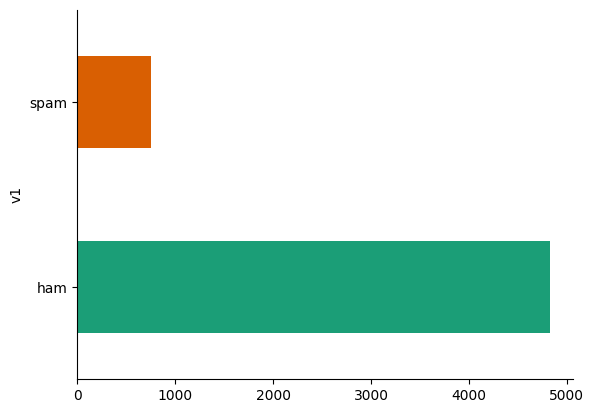

In [53]:
#plotting bargraph
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [54]:
df.shape

(5572, 2)

In [55]:
# Rename columns for clarity
df.columns = ['label', 'message']
# Display basic dataset information
print("Dataset Information:")
print(df.info())  # Check data types and missing values


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [49]:
# Show first 5 rows
print("\nFirst 5 Rows of Dataset:")
print(df.head())



First 5 Rows of Dataset:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [50]:
# Check class distribution
print("\nClass Distribution (Spam vs Ham):")
print(df['label'].value_counts())


Class Distribution (Spam vs Ham):
label
ham     4825
spam     747
Name: count, dtype: int64


In [51]:
# Convert labels to binary (spam = 1, ham = 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
# Verify conversion
print("\nLabels Converted to Binary:")
print(df.head())



Labels Converted to Binary:
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [14]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove extra spaces
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply cleaning function to all messages
df['clean_message'] = df['message'].apply(clean_text)

# Show some cleaned messages
print("\nSample Cleaned Messages:")
print(df[['message', 'clean_message']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Sample Cleaned Messages:
                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into numerical features (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)  # Keep top 5000 words
X = vectorizer.fit_transform(df['clean_message'])
y = df['label']

# Display shape of transformed data
print("\nTF-IDF Feature Shape:", X.shape)



TF-IDF Feature Shape: (5572, 5000)


In [19]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print("\nTraining Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])



Training Set Size: 4457
Testing Set Size: 1115


In [41]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

print("\nNaive Bayes Model Training Complete")



Naive Bayes Model Training Complete


In [42]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nNaive Bayes Model Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Naive Bayes Model Accuracy: 0.9731

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [36]:
from sklearn.linear_model import LogisticRegression
# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

print("\nLogistic Regression Model Training Complete")



Logistic Regression Model Training Complete


In [34]:
# Predict on test data
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Model Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Logistic Regression Model Accuracy: 0.9498

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115



In [37]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\nRandom Forest Model Training Complete")



Random Forest Model Training Complete


In [38]:
# Predict on test data
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Model Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Random Forest Model Accuracy: 0.9758

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [43]:
def predict_spam(message):
    message_cleaned = clean_text(message)  # Preprocess message
    message_vectorized = vectorizer.transform([message_cleaned])  # Vectorize text
    prediction = model.predict(message_vectorized)  # Predict
    return "Spam" if prediction == 1 else "Not Spam"

# Example test cases
print("\nExample Predictions:")
print("Message: 'Congratulations! You won a free trip!'")
print(predict_spam("Congratulations! You won a free trip!"))

print("Message: 'Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!'")
print(predict_spam("Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!"))


Example Predictions:
Message: 'Congratulations! You won a free trip!'
Not Spam
Message: 'Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!'
Spam
